# Submission 2 &ndash; Intermediate Submission

## Instructions

- Fill out the *Basic Information* and the *Results* sections.
- Make sure that this `.ipynb` file displays correctly in the GitHub file preview, including any visual output.
- If you find that any output does not display correctly, include a static screenshot as an image. For interactive outputs, add a link to a short screencast located in your repository.
- Push all required files before the deadline.

---
## Basic Information

**Team Name:** Data Sculptors

**Team Members:**
- Ali Hojatnia
- Alexander Aufreiter
- Thomas Wageneder
- Yisong Tang

**Dataset Description:**  
(max. 75 words; this serves just as a reminder)

We are using the Student Performance Data Set, which includes grades (G1, G2, G3) and 32 demographic, social, and school-related attributes for math and Portuguese courses in two Portuguese schools. The dataset covers factors like age, gender, family size, parental education, study habits, and extracurricular activities, enabling multifaceted analyses and performance prediction. Sourced from Kaggle and based on Cortez and Silva’s study.

---

## Code

Here you may place any code that is not an immediate part of your submission. Only the content of the *Results* sections will be graded for this submission.

In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from scipy import stats

sns.set(style="whitegrid")

In [56]:
mat_data = pd.read_csv('../data/student/student-mat.csv', sep=';')
por_data = pd.read_csv('../data/student/student-por.csv', sep=';')

In [57]:
mat_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [58]:
por_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [59]:
mat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [60]:
por_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [61]:
# Define a function to calculate the weighted grade
def calculate_weighted_grade(df):
    return df['G1'] * 0.2 + df['G2'] * 0.3 + df['G3'] * 0.5

# Add the weighted_grade column to both datasets
mat_data['weighted_grade'] = calculate_weighted_grade(mat_data)
por_data['weighted_grade'] = calculate_weighted_grade(por_data)

In [62]:
# Define the travel time groups in the desired order
travel_time_categories = ['<15 min', '15-30 min', '30-60 min', '>60 min']

# Define a function to categorize travel time
def categorize_travel_time(x):
    if x == 1:
        return '<15 min'
    elif x == 2:
        return '15-30 min'
    elif x == 3:
        return '30-60 min'
    else:
        return '>60 min'

# Apply the categorization function to both datasets
mat_data['travel_time_group'] = mat_data['traveltime'].apply(categorize_travel_time)
por_data['travel_time_group'] = por_data['traveltime'].apply(categorize_travel_time)

# Convert travel_time_group to a categorical type with the specified order
mat_data['travel_time_group'] = pd.Categorical(mat_data['travel_time_group'], categories=travel_time_categories, ordered=True)
por_data['travel_time_group'] = pd.Categorical(por_data['travel_time_group'], categories=travel_time_categories, ordered=True)

/var/folders/py/v35jzz7j5vdbqsq_7zm0wqz40000gn/T/ipykernel_26229/2058554597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='travel_time_group', y='weighted_grade', data=mat_data, palette="Set3")


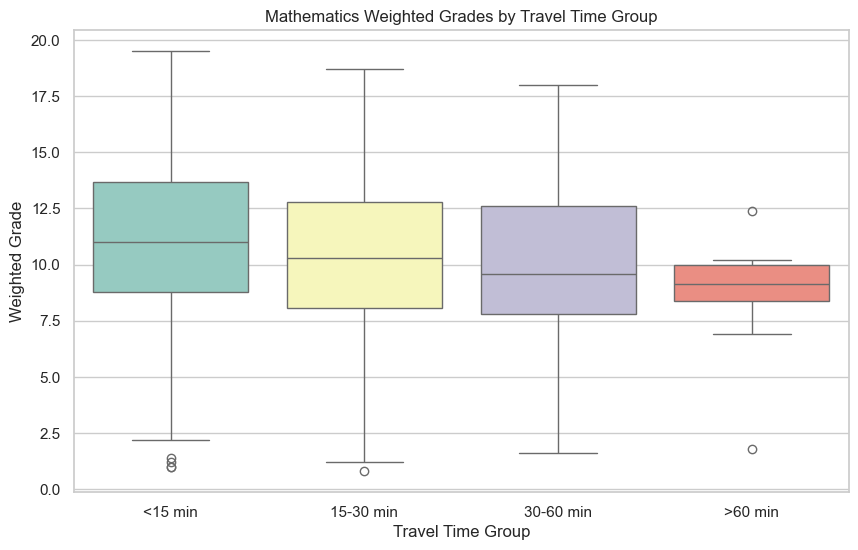

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='travel_time_group', y='weighted_grade', data=mat_data, palette="Set3")
plt.title('Mathematics Weighted Grades by Travel Time Group')
plt.xlabel('Travel Time Group')
plt.ylabel('Weighted Grade')
plt.show()

/var/folders/py/v35jzz7j5vdbqsq_7zm0wqz40000gn/T/ipykernel_26229/2759830710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='travel_time_group', y='weighted_grade', data=mat_data, palette="Set2")


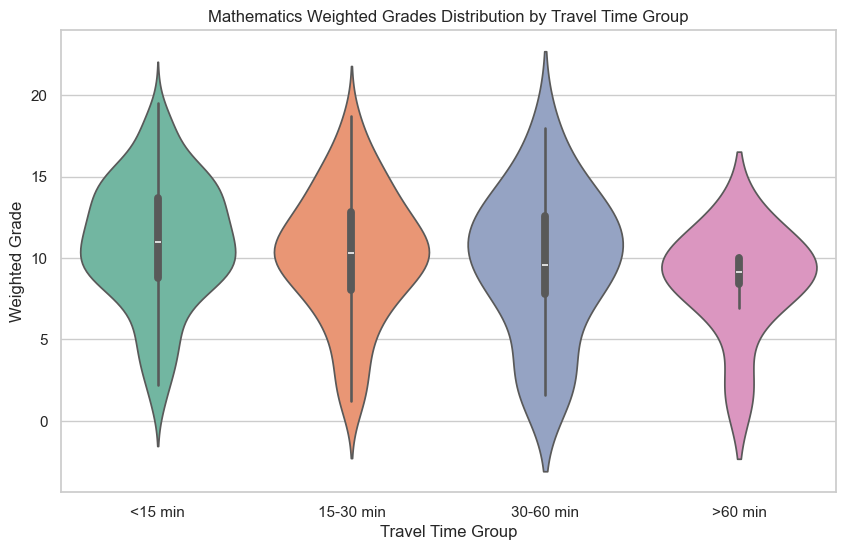

In [64]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='travel_time_group', y='weighted_grade', data=mat_data, palette="Set2")
plt.title('Mathematics Weighted Grades Distribution by Travel Time Group')
plt.xlabel('Travel Time Group')
plt.ylabel('Weighted Grade')
plt.show()

/var/folders/py/v35jzz7j5vdbqsq_7zm0wqz40000gn/T/ipykernel_26229/1723891092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='travel_time_group', y='weighted_grade', data=por_data, palette="Set3")


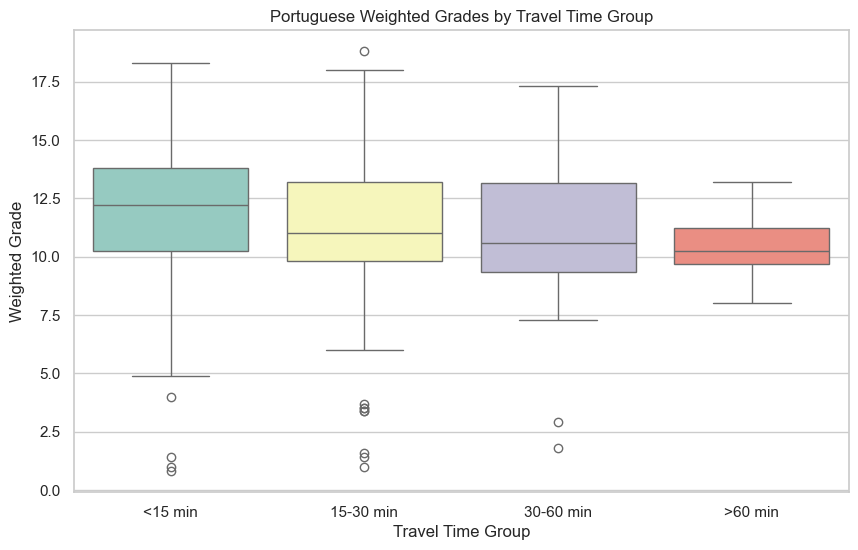

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='travel_time_group', y='weighted_grade', data=por_data, palette="Set3")
plt.title('Portuguese Weighted Grades by Travel Time Group')
plt.xlabel('Travel Time Group')
plt.ylabel('Weighted Grade')
plt.show()

/var/folders/py/v35jzz7j5vdbqsq_7zm0wqz40000gn/T/ipykernel_26229/174963192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='travel_time_group', y='weighted_grade', data=por_data, palette="Set2")


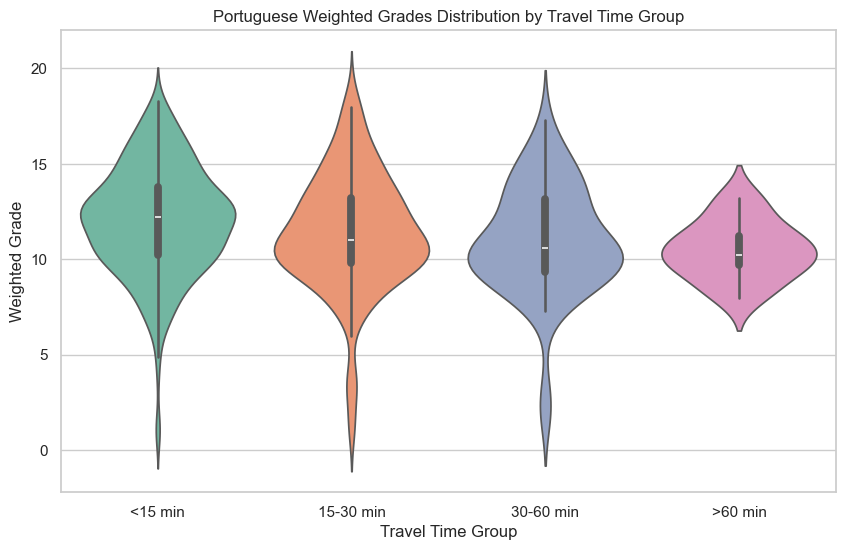

In [66]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='travel_time_group', y='weighted_grade', data=por_data, palette="Set2")
plt.title('Portuguese Weighted Grades Distribution by Travel Time Group')
plt.xlabel('Travel Time Group')
plt.ylabel('Weighted Grade')
plt.show()

In [67]:
# Calculate statistical summaries for Mathematics
mat_stats = mat_data.groupby('travel_time_group')['weighted_grade'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()
mat_stats.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'median': 'Median',
    'std': 'Standard Deviation',
    'min': 'Minimum',
    'max': 'Maximum'
}, inplace=True)

print("Mathematics Weighted Grades Statistical Summary by Travel Time Group:")
print(mat_stats)

Mathematics Weighted Grades Statistical Summary by Travel Time Group:
  travel_time_group  Count       Mean  Median  Standard Deviation  Minimum  \
0           <15 min    257  10.928016   11.00            3.861983      1.0   
1         15-30 min    107  10.183178   10.30            3.929940      0.8   
2         30-60 min     23   9.647826    9.60            4.394301      1.6   
3           >60 min      8   8.550000    9.15            3.129126      1.8   

   Maximum  
0     19.5  
1     18.7  
2     18.0  
3     12.4  


/var/folders/py/v35jzz7j5vdbqsq_7zm0wqz40000gn/T/ipykernel_26229/1757406339.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mat_stats = mat_data.groupby('travel_time_group')['weighted_grade'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()


In [68]:
# Calculate statistical summaries for Portuguese
por_stats = por_data.groupby('travel_time_group')['weighted_grade'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()
por_stats.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'median': 'Median',
    'std': 'Standard Deviation',
    'min': 'Minimum',
    'max': 'Maximum'
}, inplace=True)

print("Portuguese Weighted Grades Statistical Summary by Travel Time Group:")
print(por_stats)

Portuguese Weighted Grades Statistical Summary by Travel Time Group:
  travel_time_group  Count       Mean  Median  Standard Deviation  Minimum  \
0           <15 min    366  12.049727   12.20            2.847212      0.8   
1         15-30 min    213  11.391080   11.00            3.067259      1.0   
2         30-60 min     54  10.957407   10.60            2.893167      1.8   
3           >60 min     16  10.475000   10.25            1.506209      8.0   

   Maximum  
0     18.3  
1     18.8  
2     17.3  
3     13.2  


/var/folders/py/v35jzz7j5vdbqsq_7zm0wqz40000gn/T/ipykernel_26229/683964072.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  por_stats = por_data.groupby('travel_time_group')['weighted_grade'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()


In [69]:
from scipy import stats

# Example for Mathematics
group1 = mat_data[mat_data['travel_time_group'] == '<15 min']['weighted_grade']
group2 = mat_data[mat_data['travel_time_group'] == '15-30 min']['weighted_grade']
group3 = mat_data[mat_data['travel_time_group'] == '30-60 min']['weighted_grade']
group4 = mat_data[mat_data['travel_time_group'] == '>60 min']['weighted_grade']

f_stat, p_val = stats.f_oneway(group1, group2, group3, group4)
print(f"ANOVA for Mathematics: F-statistic = {f_stat}, p-value = {p_val}")

ANOVA for Mathematics: F-statistic = 2.206508175072512, p-value = 0.08684713940488496


In [70]:
# Define the factors to analyze
factors = ['health', 'absences', 'goout', 'freetime', 'famrel', 'studytime']

# Function to compute mean values
def compute_means(data, factors):
    return data.groupby('travel_time_group')[factors].mean()

# Compute means for Mathematics
mat_means = compute_means(mat_data, factors)

# Compute means for Portuguese
por_means = compute_means(por_data, factors)

/var/folders/py/v35jzz7j5vdbqsq_7zm0wqz40000gn/T/ipykernel_26229/2673040938.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return data.groupby('travel_time_group')[factors].mean()
/var/folders/py/v35jzz7j5vdbqsq_7zm0wqz40000gn/T/ipykernel_26229/2673040938.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return data.groupby('travel_time_group')[factors].mean()


In [71]:
# Function to normalize the data
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

# Normalize the mean values
mat_means_normalized = normalize(mat_means)
por_means_normalized = normalize(por_means)

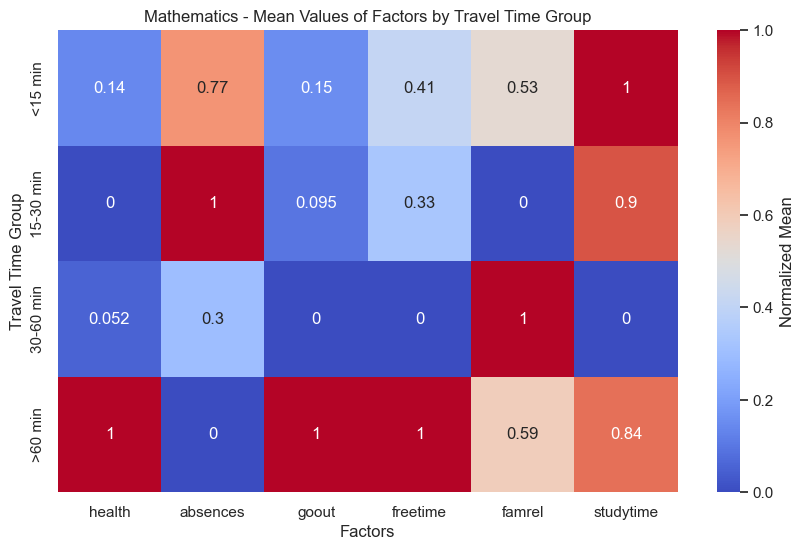

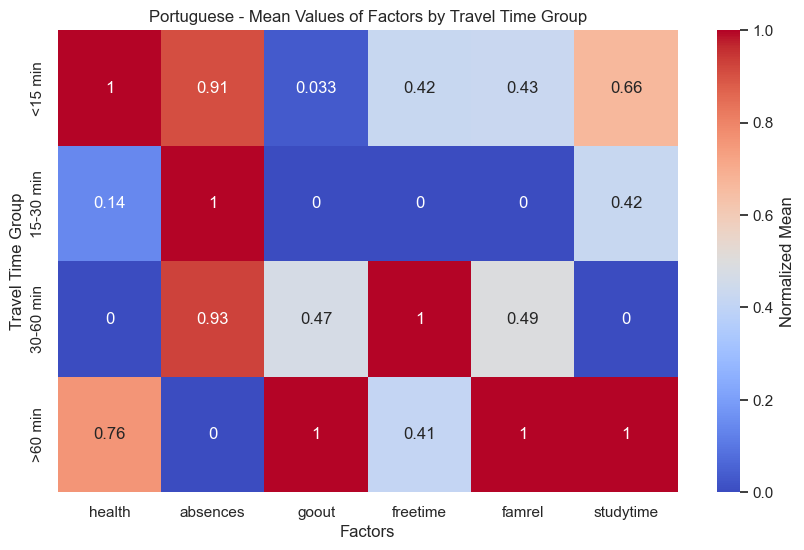

In [72]:
# Function to plot heatmap
def plot_heatmap(means, subject, normalized=False):
    plt.figure(figsize=(10, 6))
    if normalized:
        sns.heatmap(means, annot=True, cmap='coolwarm', center=0.5, cbar_kws={'label': 'Normalized Mean'})
    else:
        sns.heatmap(means, annot=True, cmap='coolwarm', cbar_kws={'label': 'Mean Value'})
    plt.title(f'{subject} - Mean Values of Factors by Travel Time Group')
    plt.xlabel('Factors')
    plt.ylabel('Travel Time Group')
    plt.show()

# Plot heatmap for Mathematics (normalized)
plot_heatmap(mat_means_normalized, 'Mathematics', normalized=True)

# Plot heatmap for Portuguese (normalized)
plot_heatmap(por_means_normalized, 'Portuguese', normalized=True)

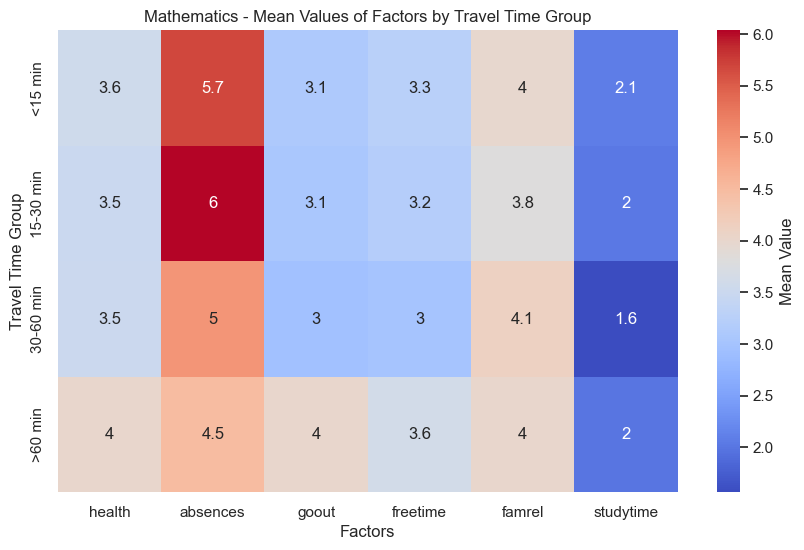

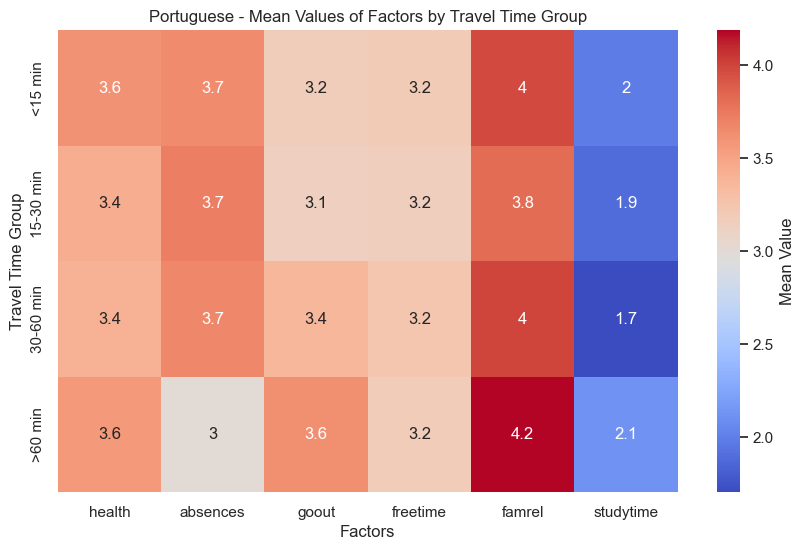

In [73]:
# Plot heatmap for Mathematics (actual means)
plot_heatmap(mat_means, 'Mathematics', normalized=False)

# Plot heatmap for Portuguese (actual means)
plot_heatmap(por_means, 'Portuguese', normalized=False)

---
## Results &ndash; Simple Hypotheses/Tasks

### A.1

Restate your hypothesis/task below.

**Hypthesis/Task A.1:** 

**Students Living Closer to School Perform Better Academically**

Description:
Students who live closer to school (traveltime = 1 or 2) tend to perform better academically (G1, G2, G3). This is attributed to factors such as better health (health), fewer absences (absences), a balanced social life (goout), reduced stress levels (indirectly measured by freetime and famrel), and more study time (studytime). These factors collectively contribute to higher academic achievement.

Place your visualizations below (max. 2). Make sure that everyting displays correctly in the GitHub file preview.

TODO

Describe your visualizations and findings. Be clear which chart(s) you are referring to and relate your findings to the hypothesis/task.
Use no more than 150 words and indicate the word count of your description below.

**Description:** TODO

**Word count**: TODO

### A.2

Restate your hypothesis/task below.

**Hypthesis/Task A.2:** TODO

Place your visualizations below (max. 2). Make sure that everyting displays correctly in the GitHub file preview.

TODO

Describe your visualizations and findings. Be clear which chart(s) you are referring to and relate your findings to the hypothesis/task. Use no more than 150 words and indicate the word count of your description below.

**Description:** TODO

**Word count**: TODO